In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [79]:
df=pd.read_csv('dataset w7.csv')

In [80]:
df

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
6,male,none,30
7,female,none,12
8,male,none,18
9,male,none,24


In [81]:
#descriptive analytics

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [83]:
#check null values

In [84]:
df.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

In [85]:
#total according to gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

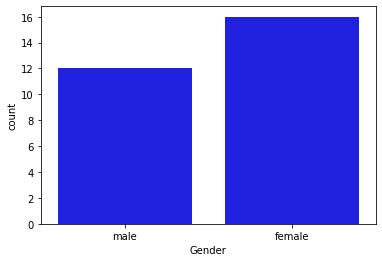

In [86]:
sns.countplot(data=df,x='Gender',color='blue')

In [87]:
#data according to test preparation

<AxesSubplot:xlabel='Test preparation', ylabel='count'>

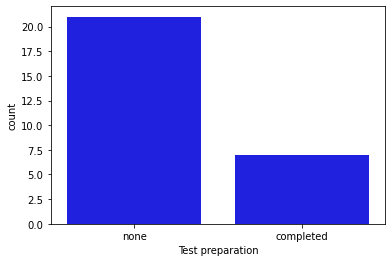

In [88]:
sns.countplot(data=df,x='Test preparation',color='blue')

In [89]:
df1=df[['Gender','Total Marks']].groupby('Gender')

In [90]:
df1.describe()

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

<AxesSubplot:xlabel='Gender', ylabel='count'>

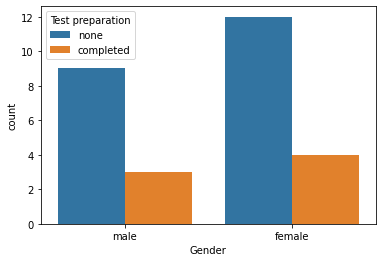

In [91]:
sns.countplot(data=df,x='Gender',hue='Test preparation')

# Check whether male and female score same marks

In [92]:
#h0:male and female didnt score same marks
#h1:male and female score same marks

In [93]:
df_male=df[df['Gender']=='male']['Total Marks']


In [94]:
df_female=df[df['Gender']=='female']['Total Marks']

In [95]:
#since we have n<30 we conduct a t test

In [96]:
from scipy.stats import ttest_ind

In [97]:
t,p=ttest_ind(df_male,df_female)
print("P value",p)

P value 0.4937822317960763


In [98]:
alpha=0.05

In [99]:
if p < alpha:
   print("reject h0")
else:
 print("failed to reject h0")

failed to reject h0


# Test preparation helps student or not

In [100]:
#Ho=test preparation didnt help the students
#H1=test preparation helped the students

In [101]:
df_none=df[df['Test preparation']=='none']['Total Marks']

In [102]:
df_none

0     14
1     28
2     18
3     48
4     21
6     30
7     12
8     18
9     24
11    23
13    28
14    41
15    13
17    45
18    47
19    36
20    14
22    41
23    27
24    27
25    38
Name: Total Marks, dtype: int64

In [103]:
df_completed=df[df['Test preparation']=='completed']['Total Marks']
df_completed

5     40
10    44
12    43
16    48
21    44
26    50
27    43
Name: Total Marks, dtype: int64

In [104]:
t,p1= ttest_ind(df_none,df_completed)
alpha =0.05

In [105]:
if p1<alpha:
   print("Reject h0")
else:
   print("Failed to reject null h0")

Reject h0


In [106]:
#Test preparation helped the students